# Wasserhaushalt alpiner Einzugsgebiete

Wir wollen die klima- und landnutzungsbedingten Veränderungen auf den erweiterten Wasserhaushalt für das Einzugsgebiet der Brixentaler Ache untersuchen. Bevor wir die dazu nötigen Daten einlesen, müssen wir die library(lubridate) laden...

In [5]:
library(lubridate)

Und einen neuen Pfad für das Arbeitsverzeichnis setzen, da sich die Daten in einem Unterordner ('/home/jovyan/Wasserhaushalt_Brixental') befinden.

Als nächstes Überprüfen wir, ob das Verzeichnis neu gesetzt wurde getwd() und können uns mit list.files() den Inhalt des Ordners anzeigen lassen.

In [6]:
getwd()

[1] "/Users/Mateosenoner/Wasserhaushalt"

In [7]:
list.files()

[1] "Aufgabe_Wasserhaushalt_Brixental_Beispiel.ipynb"     
 [2] "Aufgabe_Wasserhaushalt_Brixental_Senoner_Mateo.ipynb"
 [3] "Aufgabe_Wasserhaushalt_Brixental.ipynb"              
 [4] "cansubl_total.csv"                                   
 [5] "etr_total.csv"                                       
 [6] "interception_evar_total.csv"                         
 [7] "precip_total.csv"                                    
 [8] "runoff_total.csv"                                    
 [9] "temp_total.csv"                                      
[10] "transpiration_total.csv"

Nun kann das eigentliche Einlesen der Daten mit dem Befehl read.table() erfolgen. Die Daten liegen im csv Format vor und sind durch Tabs getrennt, deswegen benötigen wir die Bezeichnung "\t". Zudem sagen wir R, dass die Spaltenbeschriftung übernommen header = TRUE wird und das Dezimaltrennzeichen ein Punkt ist. Wir lesen zunächst erst einmal den Niederschlag (precip) ein und lassen uns die summary ausgeben. In der Zusammenfassung erkennt man, dass sich nur die Klimaszenarien (A1B und RCP8.5) unterscheiden. Die erste Spalte des data frames ist die Datumsspalte mit monatlichen Werten.

In [8]:
precip_total=read.table("precip_total.csv", header=T, dec=".",sep="\t")
summary(precip_total)

       datetime        A1B.A           A1B.B           A1B.C      
 1981-10-31:   1   Min.   :  0.0   Min.   :  0.0   Min.   :  0.0  
 1981-11-30:   1   1st Qu.: 75.3   1st Qu.: 75.3   1st Qu.: 75.3  
 1981-12-31:   1   Median :117.2   Median :117.2   Median :117.2  
 1982-01-31:   1   Mean   :129.9   Mean   :129.9   Mean   :129.9  
 1982-02-28:   1   3rd Qu.:173.6   3rd Qu.:173.6   3rd Qu.:173.6  
 1982-03-31:   1   Max.   :426.4   Max.   :426.4   Max.   :426.4  
 (Other)   :1422                                                  
  A1B.BASELINE      RCP85.A          RCP85.B          RCP85.C      
 Min.   :  0.0   Min.   :  0.00   Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 75.3   1st Qu.: 58.76   1st Qu.: 58.76   1st Qu.: 58.76  
 Median :117.2   Median :109.14   Median :109.14   Median :109.14  
 Mean   :129.9   Mean   :118.97   Mean   :118.97   Mean   :118.97  
 3rd Qu.:173.6   3rd Qu.:170.00   3rd Qu.:170.00   3rd Qu.:170.00  
 Max.   :426.4   Max.   :463.57   Max.   :463.57   Max. 

Wir transformieren mit as.Date() den Text aus der Spalte datetime in ein Datumformat.

In [9]:
precip_total$datetime = as.Date(precip_total$datetime)

Wir definieren die erste Zeitscheibe, die dem Referenzzeitraum (1981-2005) entspricht. Da wir uns hier am hydrologischen Jahr orientieren, beginnt diese am 1981-10-31 und endet am 2005-09-30. Zudem wollen wir alle Szenarien (Spalten) auswählen.

In [10]:
precip_1 = precip_total[precip_total$datetime>="1981-10-31" & precip_total$datetime<="2005-09-30",]

Jetzt können wir schon einen ersten line Plot machen, in dem wir für die erste Zeitscheibe den Niederschlag der beiden Klimaszenarien in zwei unterschiedlichen Farben darstellen. Damit die beiden Linien die gleiche plot range haben, setzten wir das ylim auf die range des RCP8.5 Niederschlags. Anschließend beschriften wir die Achsen und fügen einen aussagekräftigen Titel hinzu. Zusätzlich legen wir noch eine Legende an.

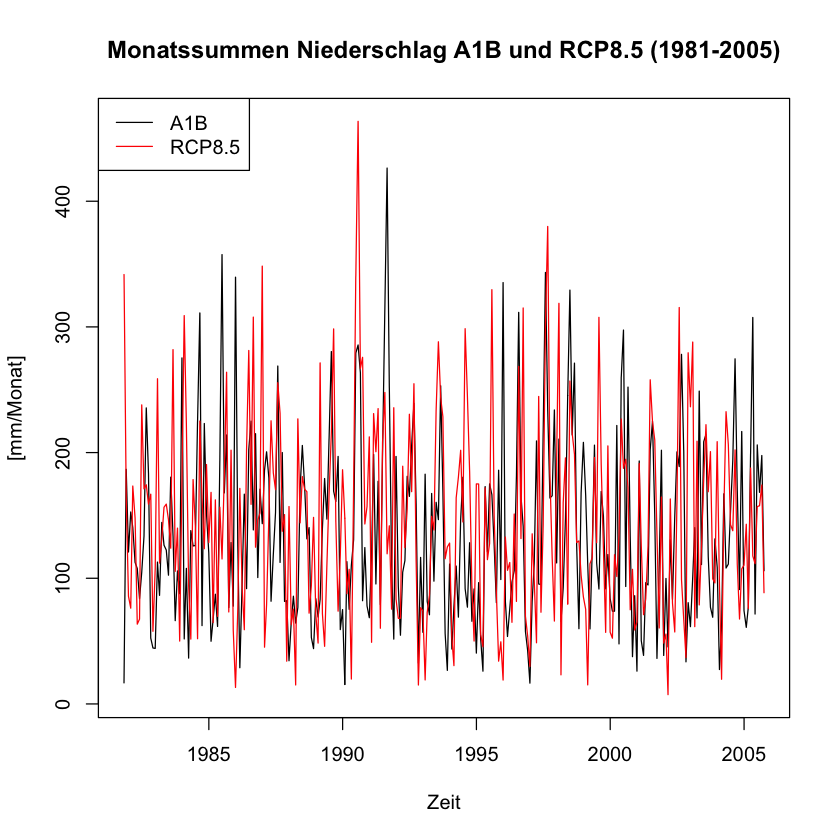

In [11]:
plot(precip_1$datetime,precip_1$A1B.BASELINE, type="l", ylim=range(precip_1$RCP85.BASELINE), ylab="[mm/Monat]", xlab="Zeit")
lines(precip_1$datetime, precip_1$RCP85.BASELINE, col="red")
title(main="Monatssummen Niederschlag A1B und RCP8.5 (1981-2005)")
legend("topleft",legend=c("A1B","RCP8.5"), col=c("black","red"), lty=1)

Als nächstes aggregieren wir die Monatsniederschlagswerte zu Mittelwerten für den Zeitraum 1981-2005 mit der Funktion aggregate(). Bevor wir mit dem Aggregieren loslegen können, müssen wir unserem data frame eine Spalte mit den Monatswerten aus der Spalte datetime hinzufügen. Danach können wir die Werte des A1B.A Szenarios anhand der Monate als Mittelwerte FUN=mean zusammenfassen.  

In [92]:
precip_1$month = format(precip_1$datetime, "%m")
precip_1
precip_1_agg_A1B= aggregate(precip_1$A1B.BASELINE ~ month, data=precip_1, FUN=mean)
precip_1_agg_A1B

datetime,A1B.A,A1B.B,A1B.C,A1B.BASELINE,RCP85.A,RCP85.B,RCP85.C,RCP85.BASELINE,month
1981-10-31,16.757,16.757,16.757,16.757,341.655,341.655,341.655,341.655,10
1981-11-30,186.698,186.698,186.698,186.698,165.149,165.149,165.149,165.149,11
1981-12-31,120.871,120.871,120.871,120.871,85.714,85.714,85.714,85.714,12
1982-01-31,152.754,152.754,152.754,152.754,76.193,76.193,76.193,76.193,01
1982-02-28,140.306,140.306,140.306,140.306,173.390,173.390,173.390,173.390,02
1982-03-31,112.666,112.666,112.666,112.666,148.077,148.077,148.077,148.077,03
1982-04-30,107.766,107.766,107.766,107.766,63.481,63.481,63.481,63.481,04
1982-05-31,83.777,83.777,83.777,83.777,67.494,67.494,67.494,67.494,05
1982-06-30,104.719,104.719,104.719,104.719,237.944,237.944,237.944,237.944,06
1982-07-31,133.431,133.431,133.431,133.431,171.129,171.129,171.129,171.129,07


month,precip_1$A1B.BASELINE
01,102.55858
02,90.33404
03,108.56462
04,129.25596
05,135.93267
06,197.04825
07,204.49654
08,205.87704
09,136.76788
10,93.76092


dim() zeigt die Dimensionen (rows and columns) des data frames an.

In [13]:
dim(precip_1_agg_A1B)

[1] 12  2

ncol() zeigt die Anzahl an Spalten und nrow() die der Zeilen.

In [14]:
ncol(precip_1_agg_A1B)

[1] 2

Wir können den Spalten des data frames noch aussagekräftige Namen mit dem Befehl colnames() geben. 

In [15]:
colnames(precip_1_agg_A1B)=c("Monat","Niederschlag.A1B")
precip_1_agg_A1B

Monat,Niederschlag.A1B
01,102.55858
02,90.33404
03,108.56462
04,129.25596
05,135.93267
06,197.04825
07,204.49654
08,205.87704
09,136.76788
10,93.76092


Bevor es zum erneuten Plotten geht, aggregieren wir ebenfalls den Niederschlag des RCP8.5 Szenarios und weisen den Spalten die gleichen Beschriftungen zu. 

In [16]:
precip_1_agg_RCP85 = aggregate(precip_1$RCP85.BASELINE ~ month, data=precip_1, FUN=mean)
colnames(precip_1_agg_RCP85) = c("Monat", "Niederschlag.RCP8.5")
precip_1_agg_RCP85

Monat,Niederschlag.RCP8.5
01,126.73296
02,98.69688
03,124.01000
04,130.34417
05,141.60842
06,184.10788
07,227.93708
08,214.95083
09,143.47338
10,110.84137


Wir Plotten nun die Niederschlagsregime der beiden Klimaszenarien für die erste Zeitscheibe. Zum besseren Ablesen der Werte können wir mit dem Befehl grid(NULL, NULL, lwd =1) ein Raster über den Plot legen. Möchte man die Schriftgröße des Titels anpassen, so kann man das über den Befehl cex.main machen. Der Wertebereich ist hier von 0.1 bis 1.

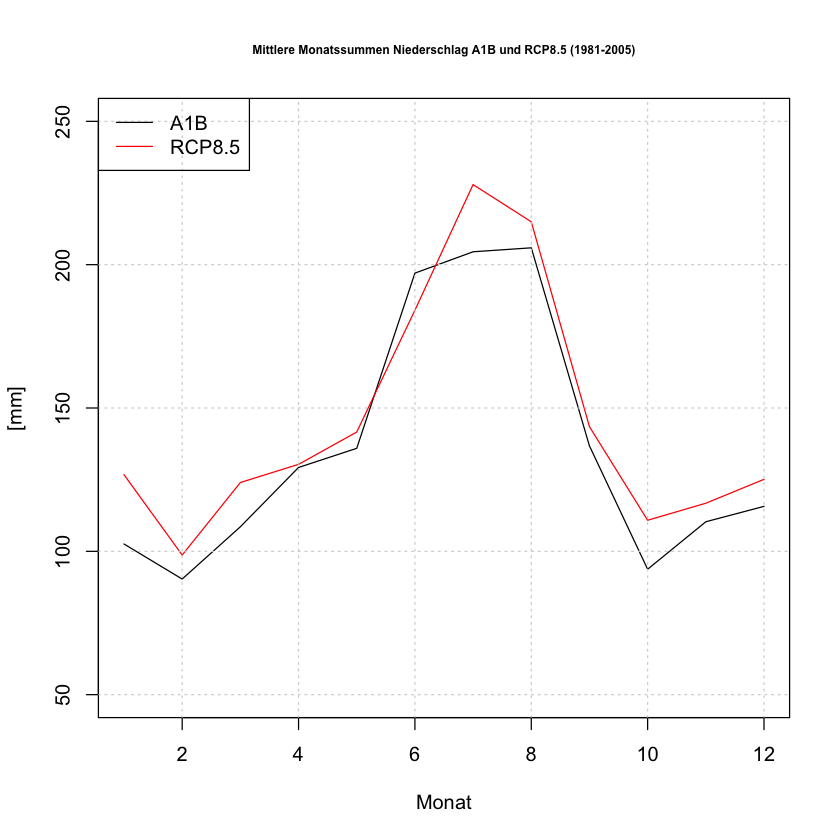

In [17]:
plot(precip_1_agg_A1B$Monat, precip_1_agg_A1B$Niederschlag.A1B, type ="l", ylim=c(50,250),ylab="[mm]", xlab="Monat")
lines(precip_1_agg_RCP85$Monat, precip_1_agg_RCP85$Niederschlag.RCP8.5, col="red")
title(main="Mittlere Monatssummen Niederschlag A1B und RCP8.5 (1981-2005)",cex.main=0.6)
grid(NULL,NULL, lwd = 1)
legend("topleft", legend = c("A1B","RCP8.5"),col = c("black","red"), lty=1)

Wie kann das Aggregieren für mehrere Szenarien verkürzt werden? Hierzu lesen wir die Evapotranspiration (etr) ein und transformieren die Datumsspalte erneut. Zudem fügen wir wieder eine Spalte mit den Monaten hinzu und lassen uns die ersten zehn Reihen des data frames anzeigen.

In [18]:
etr_total = read.table("etr_total.csv", header=T, dec=".", sep="\t")
etr_total$datetime = as.Date(etr_total$datetime)
etr_total$month = format(etr_total$datetime, "%m")
head(etr_total, n=10)

datetime,A1B.A,A1B.B,A1B.C,A1B.BASELINE,RCP85.A,RCP85.B,RCP85.C,RCP85.BASELINE,month
1981-10-31,28.26954,28.26953,28.26953,28.26952,30.21930,30.21931,30.21931,30.21928,10
1981-11-30,20.21451,20.21451,20.21452,20.21453,30.07118,30.07119,30.07119,30.07119,11
1981-12-31,20.43260,20.43260,20.43260,20.43260,25.83942,25.83942,25.83942,25.83942,12
1982-01-31,21.82174,21.82174,21.82174,21.82174,19.35030,19.35030,19.35030,19.35030,01
1982-02-28,18.50415,18.50414,18.50415,18.50415,16.92410,16.92410,16.92410,16.92410,02
1982-03-31,23.68474,23.68475,23.68475,23.68475,59.31021,59.31020,59.31019,59.31019,03
1982-04-30,35.16696,35.16696,35.16696,35.16696,51.35741,51.35741,51.35741,51.35739,04
1982-05-31,66.98856,66.98858,66.98854,66.98855,75.86686,75.86689,75.86682,75.86686,05
1982-06-30,96.37681,96.37679,96.37679,96.37677,103.27963,103.27962,103.27960,103.27960,06
1982-07-31,114.43524,114.43531,114.43533,114.43527,124.47223,124.47217,124.47218,124.47220,07


Nun machen wir uns mit Listen in R vertraut. Listen können Elemente verschiedenen Typs beinhalten, wie zum Beispiel numbers, strings und vectors. Wir erstellen uns jetzt eine Testliste indem wir Szenarien und Monate zunächst als Vektoren definieren.

scenario=c('A1B.A', 'A1B.B', 'A1B.C', 'A1B.BASELINE', 'RCP85.A', 'RCP85.B', 'RCP85.C', 'RCP85.BASELINE')
month=c(seq(1,12,1))
test_list=list(month,scenario) # Liste ist ein Vektor, der Objekte enthält

Wie sieht diese Liste nun aus?

In [19]:
scenario = colnames(etr_total[2:9])
monate = c(seq(1,12,1))
test_list = list(monate,scenario)
test_list

[[1]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12

[[2]]
[1] "A1B.A"          "A1B.B"          "A1B.C"          "A1B.BASELINE"  
[5] "RCP85.A"        "RCP85.B"        "RCP85.C"        "RCP85.BASELINE"

Wie lang ist diese Liste? length() gibt die Länge aus.

In [20]:
length(test_list)

[1] 2

Wir wählen eine Objektreihe aus der Liste mit doppelten [[]] aus.

In [21]:
test_list[[2]]

[1] "A1B.A"          "A1B.B"          "A1B.C"          "A1B.BASELINE"  
[5] "RCP85.A"        "RCP85.B"        "RCP85.C"        "RCP85.BASELINE"

Wollen wir mehrere Objektreihen aus der Liste auswählen, so können wir einen Bereich in den [] definieren.

In [22]:
test_list[1:2]

[[1]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12

[[2]]
[1] "A1B.A"          "A1B.B"          "A1B.C"          "A1B.BASELINE"  
[5] "RCP85.A"        "RCP85.B"        "RCP85.C"        "RCP85.BASELINE"

Wollen wir aber nur einen Member aus einer Objektreihe auswählen, verwenden wir doppelte [[]] für die Obejktreihe und einfache [] für die Position des Objekts aus der Reihe. In den einfachen [] kann man auch einen Auswahlbereich definieren, beispielsweise mit [1:5].

In [23]:
test_list[[2]][1]
test_list[[1]][1:8]

[1] "A1B.A"

[1] 1 2 3 4 5 6 7 8

Soweit das mit der Navigation in Listen klappt, können wir uns mit den for() loops (Schleifen) in R auseinandersetzten. Mit dem loop können wir uns über eine Zählervariable durch Listen bewegen. Für den Anfang schreiben wir eine einfache Schleife: 

for(i in c(1:12)){ 
    print(i)
    }
    
Wir sehen, i ist die Variable, die so lange ausgegeben wird bis der Anweisungsvektor erfüllt ist. In unserem Fall ist die Abbruchbedingung die Zahl 12.

In [24]:
for(i in c(1:12)){
    print(i)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12


Bevor wir die Schleife für das Aggregieren anwenden können, definieren wir wieder die erste Zeitscheibe für etr und legen eine leere Liste an, in die die aggregierten Werte geschrieben werden: 

etr_1_list = list()

Wie lange muss unser Anweisungsvektor sein?

Wir wollen alle aggregierten Monatswerte eines Szenarios als eine eigene Vektorreihe in die Liste schreiben und verwenden deswegen etr_1_list[[i]]=aggregate(). Die aggregate Funktion ist bis auf eine kleine Ausnahme identisch mit der bereits bekannten Funktion. Wir müssen nur definieren für welchen Wertebereich die Zusammenfassung erfolgen soll. Dazu schreiben wir aggregate(etr_[[1+i]] ~ .... mit dem 1+i gehen wir sicher, dass die Zusammenfassung nicht für die Datumsspalte durchgeführt wird. War das Aggregieren erfolgreich, können wir uns die erstellte Liste und den Aufbau mal genauer anschauen.

In [25]:
etr_1 = etr_total[etr_total$datetime>="1981-10-31" & etr_total$datetime<="2005-09-30",]
etr_1_list=list()
for(i in c(1:8)){
    etr_1_list[[i]]=aggregate(etr_1[[i+1]] ~ month, data=etr_1, FUN= mean)
}
etr_1_list

month,etr_1[[i + 1]]
01,18.37867
02,18.57516
03,26.97324
04,40.23301
05,65.83493
06,90.50327
07,105.43671
08,95.30938
09,60.10189
10,36.38577


Wie lang ist unsere Liste?

In [26]:
length(etr_1_list)

[1] 8

Jetzt können wir diese Liste plotten indem wir wieder für jede Linie in unserem Plot eine Vektorreihe auswählen mit [[]]. Für die Plots muss keine Datumsspalte ausgewählt werden, da wir ja nur 12 Objekte in der Vektorreihe haben. Nun könnt ihr einfach alle weiteren Szenarien mit lines() hinzufügen und einer bestimmten Farbe oder einer anderen Liniensignatur lty= zuweisen. In der Legende kann man über c() für jede Linie einen Namen, die jeweilige Farbe und/oder Liniensignatur hinzufügen.

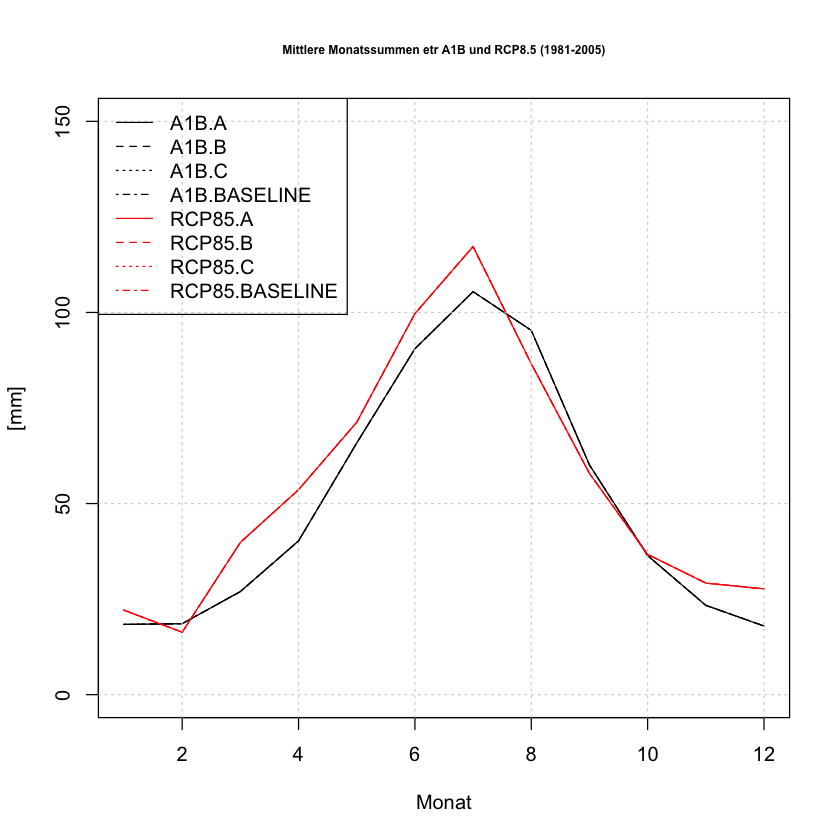

In [27]:
plot(etr_1_list[[4]], type="l",ylim=c(0,150),ylab="[mm]",xlab="Monat")
lines(etr_1_list[[1]], col="black", lty=2)
lines(etr_1_list[[2]], col= "black", lty =3)
lines(etr_1_list[[3]], col ="black", lty =4)
lines(etr_1_list[[8]], col="red")
lines(etr_1_list[[5]],col="red", lty=2)
lines(etr_1_list[[6]],col="red",lty=3)
lines(etr_1_list[[7]],col="red",lty=4)
grid(NULL,NULL, lwd =1)
title(main="Mittlere Monatssummen etr A1B und RCP8.5 (1981-2005)", cex.main=0.6)
legend("topleft", legend=scenario, col=c("black","black","black","black","red","red","red","red"), lty=c(1,2,3,4,1,2,3,4))

Für unseren nächsten Plot erstellen wir die restlichen drei Zeitscheiben von etr und aggregieren über die selbe Methodik die Monatswerte. Es wäre sinnvoll die Listen einfach durch zu nummerieren (etr_1_list, etr_2_list,...), um am Schluss den Überblick zu behalten.  

In [28]:
# Zweite Zeitscheibe etr
etr_2 = etr_total[etr_total$datetime>="2005-10-31" & etr_total$datetime<="2035-09-30",]
etr_2_list=list()
for(i in c(1:8)){
    etr_2_list[[i]]=aggregate(etr_2[[i+1]] ~ month, data=etr_2, FUN= mean)
}

# Dritte Zeitscheibe etr
etr_3 = etr_total[etr_total$datetime>="2035-10-31" & etr_total$datetime<="2065-09-30",]
etr_3_list=list()
for(i in c(1:8)){
    etr_3_list[[i]]=aggregate(etr_3[[i+1]] ~ month, data=etr_3, FUN= mean)
}

# Vierte Zeitscheibe etr
etr_4 = etr_total[etr_total$datetime>="2070-10-31" & etr_total$datetime<="2100-09-30",]
etr_4_list=list()
for(i in c(1:8)){
    etr_4_list[[i]]=aggregate(etr_4[[i+1]] ~ month, data=etr_4, FUN= mean)
}


Haben wir nun zu jeder Zeitscheibe die jeweilige Liste, können wir mit dem Befehl par(mfrow=c(2,2)) ein neues Plotfenster mit vier gleich großen Plots definieren. Dadurch bekommen wir ein Plotfenster mit nrows=2 und ncols=2. Zu beachten ist, dass mit jedem neuen Befehl plot() ein neues Fenster "gefüllt" wird. Ansonsten können wir, wie schon von oben bekannt, die Plotcodes übernehmen und untereinanderschreiben. Es sollte darauf geachtet werden, dass die Reihenfolge der Zeitscheiben stimmt. Damit wir wissen welche Zeitscheibe wo im Plot zu sehen ist, sollte dies aus der Überschrift hervorgehen. Zudem ist es sinnvoll die Achsen cex.axis= und Beschriftungen cex.lab= und die Legende cex= in ihrer Größe anzupassen. Die Umrandung der Legende kann durch bty="n" entfernt werden. Elemente, die sich stetig wiederholen, können wir auch einmal fix definieren werden, wie zum Beispiel die Linientypen in der Legende. Eventuell lässt sich das Plotten auch über eine Schleife automatisieren? Jetzt haben wir eine vollständige Zeitreihe, die wir analysieren können.

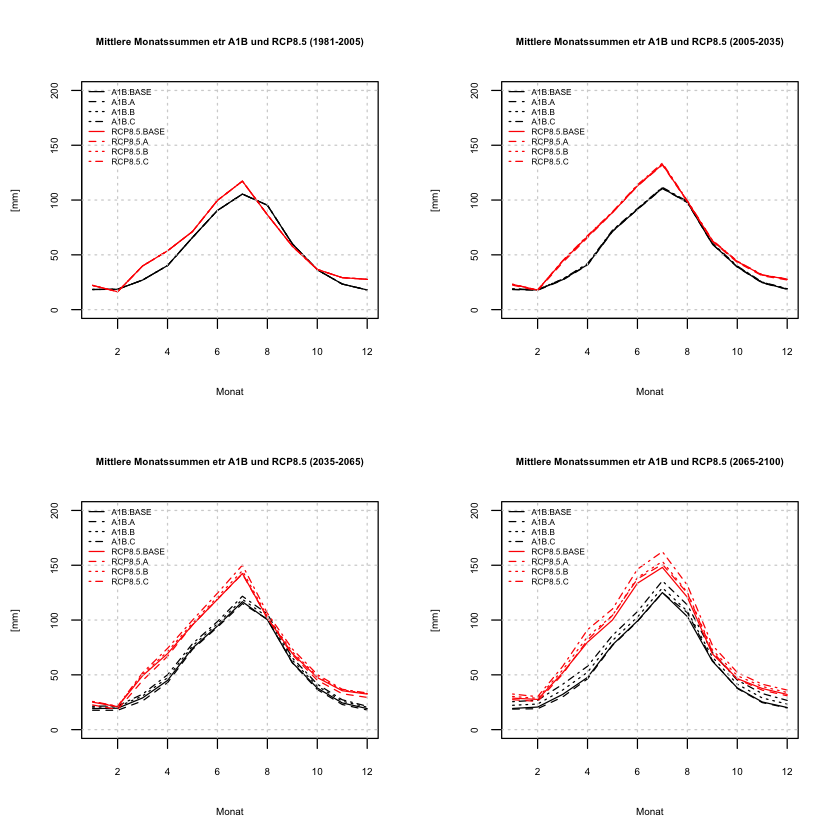

In [29]:
linetype=c(1,2,3,4,1,2,3,4) # Vektor, der die Linientypen in der Legende definiert

par(mfrow=c(2,2))
plot(etr_1_list[[4]],type="l",ylim=c(0,200),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(etr_1_list[[1]],col="black",lty=2)
lines(etr_1_list[[2]],col="black",lty=3)
lines(etr_1_list[[3]],col="black",lty=4)
lines(etr_1_list[[8]],col="red")
lines(etr_1_list[[5]],col="red",lty=2)
lines(etr_1_list[[6]],col="red",lty=3)
lines(etr_1_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen etr A1B und RCP8.5 (1981-2005)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(etr_2_list[[4]],type="l",ylim=c(0,200),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(etr_2_list[[1]],col="black",lty=2)
lines(etr_2_list[[2]],col="black",lty=3)
lines(etr_2_list[[3]],col="black",lty=4)
lines(etr_2_list[[8]],col="red")
lines(etr_2_list[[5]],col="red",lty=2)
lines(etr_2_list[[6]],col="red",lty=3)
lines(etr_2_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen etr A1B und RCP8.5 (2005-2035)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(etr_3_list[[4]],type="l",ylim=c(0,200),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(etr_3_list[[1]],col="black",lty=2)
lines(etr_3_list[[2]],col="black",lty=3)
lines(etr_3_list[[3]],col="black",lty=4)
lines(etr_3_list[[8]],col="red")
lines(etr_3_list[[5]],col="red",lty=2)
lines(etr_3_list[[6]],col="red",lty=3)
lines(etr_3_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen etr A1B und RCP8.5 (2035-2065)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(etr_4_list[[4]],type="l",ylim=c(0,200),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(etr_4_list[[1]],col="black",lty=2)
lines(etr_4_list[[2]],col="black",lty=3)
lines(etr_4_list[[3]],col="black",lty=4)
lines(etr_4_list[[8]],col="red")
lines(etr_4_list[[5]],col="red",lty=2)
lines(etr_4_list[[6]],col="red",lty=3)
lines(etr_4_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen etr A1B und RCP8.5 (2065-2100)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

Falls wir die genauen Werte nicht aus den Liniendiagrammen ablesen können, kann man diese entweder in den jeweiligen Listen nachschauen oder man erstellt sich aus den einzelnen Listen einen jeweiligen data frame. Über den Befehl cbind.data.frame() werden die Vektorreihen aus der Liste spaltenweise, deswegen cbind für column bind, aneinander gefügt. Dazu wählen wir erstmal die erste Vektorreihe etr_4_list[[1]][1] aus, um mit einer Datumsspalte zu starten. Anschließend können weiteren Reihen (etr_4_list[[1]][1],etr_4_list[[1]][2],...) hinzugefügt werden durch eine einfach Auflistung. In dem data frame können wir nun die Werte der einzelnen Szenarien aus einer Zeitscheibe übersichtlich anschauen. Über colnames() können wir der Tabelle aussagekräftige Spaltenbeschriftungen geben. Mit dem selben Verfahren können wir die klima- und landnutzungsbedingten Veränderungen auf den Abfluss, die Evaporation aus dem flüssigen und festen Interzeptionsspeicher und die Transpiration untersuchen. Da es bei Temperatur und Niederschlag keine landnutzungsbedingte Veränderung gibt, reicht es in den Plots aus nur das Baseline Szenario darzustellen. Viel Erfolg bei der Interpretation der Ergebnisse!    

In [94]:
#Tabelle erstellen 4.Zeitscheibe
etr_4_table=cbind.data.frame(etr_4_list[[1]][1],etr_4_list[[1]][2],etr_4_list[[2]][2],etr_4_list[[3]][2],etr_4_list[[4]][2],
                      etr_4_list[[5]][2],etr_4_list[[6]][2],etr_4_list[[7]][2],etr_4_list[[8]][2])
colnames(etr_4_table)=c("month",scenario)
#etr_4_table

#Tabelle erstellen 3.Zeitscheibe
etr_3_table=cbind.data.frame(etr_3_list[[1]][1],etr_3_list[[1]][2],etr_3_list[[2]][2],etr_3_list[[3]][2],etr_3_list[[4]][2],
                      etr_3_list[[5]][2],etr_3_list[[6]][2],etr_3_list[[7]][2],etr_3_list[[8]][2])
colnames(etr_3_table)=c("month",scenario)
#etr_3_table

#Tabelle erstellen 2.Zeitscheibe
etr_2_table=cbind.data.frame(etr_2_list[[1]][1],etr_2_list[[1]][2],etr_2_list[[2]][2],etr_2_list[[3]][2],etr_2_list[[4]][2],
                      etr_2_list[[5]][2],etr_2_list[[6]][2],etr_2_list[[7]][2],etr_2_list[[8]][2])
colnames(etr_4_table)=c("month",scenario)
#etr_2_table

#Tabelle erstellen 1.Zeitscheibe
etr_1_table=cbind.data.frame(etr_1_list[[1]][1],etr_1_list[[1]][2],etr_1_list[[2]][2],etr_1_list[[3]][2],etr_1_list[[4]][2],
                      etr_1_list[[5]][2],etr_1_list[[6]][2],etr_1_list[[7]][2],etr_1_list[[8]][2])
colnames(etr_1_table)=c("month",scenario)
etr_1_table

month,A1B.A,A1B.B,A1B.C,A1B.BASELINE,RCP85.A,RCP85.B,RCP85.C,RCP85.BASELINE
01,18.37867,18.37867,18.37867,18.37867,22.10951,22.10951,22.10951,22.10950
02,18.57516,18.57516,18.57516,18.57516,16.33393,16.33393,16.33394,16.33394
03,26.97324,26.97323,26.97323,26.97324,39.83454,39.83453,39.83453,39.83454
04,40.23301,40.23301,40.23301,40.23302,53.62281,53.62279,53.62279,53.62279
05,65.83493,65.83492,65.83494,65.83494,71.26731,71.26730,71.26727,71.26731
06,90.50327,90.50328,90.50326,90.50328,99.68016,99.68013,99.68013,99.68015
07,105.43671,105.43674,105.43672,105.43672,117.24226,117.24216,117.24222,117.24224
08,95.30938,95.30941,95.30935,95.30936,86.57212,86.57212,86.57211,86.57214
09,60.10189,60.10187,60.10188,60.10187,57.88652,57.88652,57.88652,57.88651
10,36.38577,36.38577,36.38577,36.38577,36.70288,36.70288,36.70288,36.70289


In [31]:
#Einlesen von cansubl
cansubl_total=read.table("cansubl_total.csv", header=T, dec=".",sep="\t")
summary(cansubl_total)

       datetime        A1B.A               A1B.B               A1B.C          
 1981-10-31:   1   Min.   : 0.000000   Min.   : 0.000000   Min.   : 0.000000  
 1981-11-30:   1   1st Qu.: 0.004025   1st Qu.: 0.004462   1st Qu.: 0.004535  
 1981-12-31:   1   Median : 0.678980   Median : 0.717755   Median : 0.818000  
 1982-01-31:   1   Mean   : 3.085917   Mean   : 3.420515   Mean   : 3.865432  
 1982-02-28:   1   3rd Qu.: 5.320605   3rd Qu.: 5.883298   3rd Qu.: 6.505203  
 1982-03-31:   1   Max.   :23.400190   Max.   :24.194150   Max.   :30.421070  
 (Other)   :1422                                                              
  A1B.BASELINE          RCP85.A           RCP85.B           RCP85.C       
 Min.   : 0.000000   Min.   : 0.0000   Min.   : 0.0000   Min.   : 0.0000  
 1st Qu.: 0.001522   1st Qu.: 0.0000   1st Qu.: 0.0000   1st Qu.: 0.0000  
 Median : 0.527985   Median : 0.1398   Median : 0.1455   Median : 0.1764  
 Mean   : 2.922402   Mean   : 2.2696   Mean   : 2.4184   Mean   : 2.

In [33]:
cansubl_total$datetime = as.Date(cansubl_total$datetime)

In [36]:
#Zeitscheiben definieren für cansubl

cansubl_total$month = format(cansubl_total$datetime, "%m") #zuerst eine Monatsspalte hinzufügen

cansubl_1 = cansubl_total[cansubl_total$datetime>="1981-10-31" & cansubl_total$datetime<="2005-09-30",]
cansubl_1_list=list()
for(i in c(1:8)){
    cansubl_1_list[[i]]=aggregate(cansubl_1[[i+1]] ~ month, data=cansubl_1, FUN= mean)
}
cansubl_1_list#erste liste anzeigen lassen

# Zweite Zeitscheibe cansubl
cansubl_2 = cansubl_total[cansubl_total$datetime>="2005-10-31" & cansubl_total$datetime<="2035-09-30",]
cansubl_2_list=list()
for(i in c(1:8)){
    cansubl_2_list[[i]]=aggregate(cansubl_2[[i+1]] ~ month, data=cansubl_2, FUN= mean)
}

# Dritte Zeitscheibe cansubl
cansubl_3 = cansubl_total[cansubl_total$datetime>="2035-10-31" & cansubl_total$datetime<="2065-09-30",]
cansubl_3_list=list()
for(i in c(1:8)){
    cansubl_3_list[[i]]=aggregate(cansubl_3[[i+1]] ~ month, data=cansubl_3, FUN= mean)
}

# Vierte Zeitscheibe cansubl
cansubl_4 = cansubl_total[cansubl_total$datetime>="2070-10-31" & cansubl_total$datetime<="2100-09-30",]
cansubl_4_list=list()
for(i in c(1:8)){
    cansubl_4_list[[i]]=aggregate(cansubl_4[[i+1]] ~ month, data=cansubl_4, FUN= mean)
}


month,cansubl_1[[i + 1]]
01,9.17460417
02,8.64473292
03,6.12946292
04,3.83263625
05,0.47360958
06,0.11487625
07,0.01611917
08,0.01429917
09,0.07412000
10,1.19972083


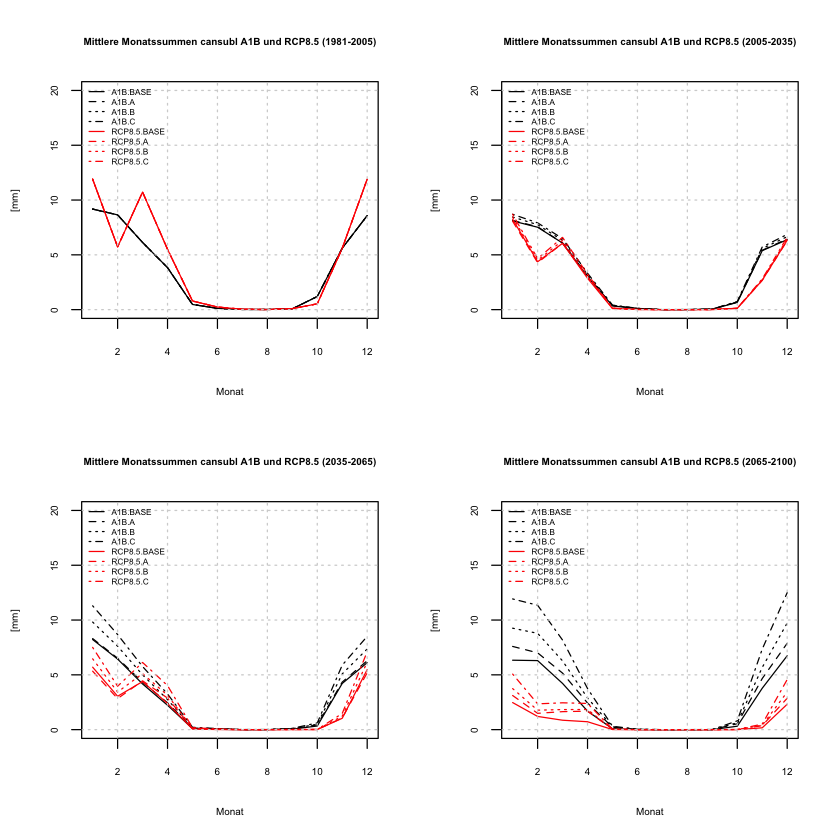

In [98]:
#plotten

par(mfrow=c(2,2))
plot(cansubl_1_list[[4]],type="l",ylim=c(0,20),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(cansubl_1_list[[1]],col="black",lty=2)
lines(cansubl_1_list[[2]],col="black",lty=3)
lines(cansubl_1_list[[3]],col="black",lty=4)
lines(cansubl_1_list[[8]],col="red")
lines(cansubl_1_list[[5]],col="red",lty=2)
lines(cansubl_1_list[[6]],col="red",lty=3)
lines(cansubl_1_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen cansubl A1B und RCP8.5 (1981-2005)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(cansubl_2_list[[4]],type="l",ylim=c(0,20),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(cansubl_2_list[[1]],col="black",lty=2)
lines(cansubl_2_list[[2]],col="black",lty=3)
lines(cansubl_2_list[[3]],col="black",lty=4)
lines(cansubl_2_list[[8]],col="red")
lines(cansubl_2_list[[5]],col="red",lty=2)
lines(cansubl_2_list[[6]],col="red",lty=3)
lines(cansubl_2_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen cansubl A1B und RCP8.5 (2005-2035)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(cansubl_3_list[[4]],type="l",ylim=c(0,20),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(cansubl_3_list[[1]],col="black",lty=2)
lines(cansubl_3_list[[2]],col="black",lty=3)
lines(cansubl_3_list[[3]],col="black",lty=4)
lines(cansubl_3_list[[8]],col="red")
lines(cansubl_3_list[[5]],col="red",lty=2)
lines(cansubl_3_list[[6]],col="red",lty=3)
lines(cansubl_3_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen cansubl A1B und RCP8.5 (2035-2065)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(cansubl_4_list[[4]],type="l",ylim=c(0,20),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(cansubl_4_list[[1]],col="black",lty=2)
lines(cansubl_4_list[[2]],col="black",lty=3)
lines(cansubl_4_list[[3]],col="black",lty=4)
lines(cansubl_4_list[[8]],col="red")
lines(cansubl_4_list[[5]],col="red",lty=2)
lines(cansubl_4_list[[6]],col="red",lty=3)
lines(cansubl_4_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen cansubl A1B und RCP8.5 (2065-2100)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

In [99]:
#Tabelle erstellen, 4. Zeitscheibe
cansubl_4_table=cbind.data.frame(cansubl_4_list[[1]][1],cansubl_4_list[[1]][2],cansubl_4_list[[2]][2],cansubl_4_list[[3]][2],cansubl_4_list[[4]][2],
                      cansubl_4_list[[5]][2],cansubl_4_list[[6]][2],cansubl_4_list[[7]][2],cansubl_4_list[[8]][2])
colnames(cansubl_4_table)=c("month",scenario)
#cansubl_4_table

#3. Zeitscheibe
cansubl_3_table=cbind.data.frame(cansubl_3_list[[1]][1],cansubl_3_list[[1]][2],cansubl_3_list[[2]][2],cansubl_3_list[[3]][2],cansubl_3_list[[4]][2],
                      cansubl_3_list[[5]][2],cansubl_3_list[[6]][2],cansubl_3_list[[7]][2],cansubl_3_list[[8]][2])
colnames(cansubl_3_table)=c("month",scenario)
#cansubl_3_table

#2. Zeitscheibe
cansubl_2_table=cbind.data.frame(cansubl_2_list[[1]][1],cansubl_2_list[[1]][2],cansubl_2_list[[2]][2],cansubl_2_list[[3]][2],cansubl_2_list[[4]][2],
                      cansubl_2_list[[5]][2],cansubl_2_list[[6]][2],cansubl_2_list[[7]][2],cansubl_2_list[[8]][2])
colnames(cansubl_2_table)=c("month",scenario)
#cansubl_2_table

#1. Zeitscheibe
cansubl_1_table=cbind.data.frame(cansubl_1_list[[1]][1],cansubl_1_list[[1]][2],cansubl_1_list[[2]][2],cansubl_1_list[[3]][2],cansubl_1_list[[4]][2],
                      cansubl_1_list[[5]][2],cansubl_1_list[[6]][2],cansubl_1_list[[7]][2],cansubl_1_list[[8]][2])
colnames(cansubl_1_table)=c("month",scenario)
cansubl_1_table

month,A1B.A,A1B.B,A1B.C,A1B.BASELINE,RCP85.A,RCP85.B,RCP85.C,RCP85.BASELINE
01,9.17460417,9.17460417,9.17460417,9.17460417,11.90390542,11.90390542,11.90390542,11.90390542
02,8.64473292,8.64473292,8.64473292,8.64473292,5.72421250,5.72421250,5.72421250,5.72421250
03,6.12946292,6.12946292,6.12946292,6.12946292,10.72788417,10.72788417,10.72788417,10.72788417
04,3.83263625,3.83263625,3.83263625,3.83263625,5.50572375,5.50572375,5.50572375,5.50572375
05,0.47360958,0.47360958,0.47360958,0.47360958,0.78844833,0.78844833,0.78844833,0.78844833
06,0.11487625,0.11487625,0.11487625,0.11487625,0.23801958,0.23801958,0.23801958,0.23801958
07,0.01611917,0.01611917,0.01611917,0.01611917,0.03507250,0.03507250,0.03507250,0.03507250
08,0.01429917,0.01429917,0.01429917,0.01429917,0.00725375,0.00725375,0.00725375,0.00725375
09,0.07412000,0.07412000,0.07412000,0.07412000,0.09204875,0.09204875,0.09204875,0.09204875
10,1.19972083,1.19972083,1.19972083,1.19972083,0.53111833,0.53111833,0.53111833,0.53111833


In [41]:
#Einlesen von Transpiration
transpiration_total=read.table("transpiration_total.csv", header=T, dec=".",sep="\t")
summary(transpiration_total)

       datetime        A1B.A            A1B.B            A1B.C       
 1981-10-31:   1   Min.   :-3.050   Min.   :-3.580   Min.   :-5.500  
 1981-11-30:   1   1st Qu.: 4.138   1st Qu.: 4.529   1st Qu.: 4.376  
 1981-12-31:   1   Median :11.175   Median :12.295   Median :12.635  
 1982-01-31:   1   Mean   :17.634   Mean   :18.619   Mean   :18.993  
 1982-02-28:   1   3rd Qu.:27.851   3rd Qu.:29.659   3rd Qu.:30.671  
 1982-03-31:   1   Max.   :92.260   Max.   :95.120   Max.   :99.758  
 (Other)   :1422                                                     
  A1B.BASELINE       RCP85.A           RCP85.B           RCP85.C       
 Min.   :-3.050   Min.   : -4.253   Min.   : -4.253   Min.   : -4.253  
 1st Qu.: 4.883   1st Qu.:  9.973   1st Qu.: 10.300   1st Qu.: 10.058  
 Median :11.856   Median : 21.328   Median : 21.819   Median : 22.129  
 Mean   :18.338   Mean   : 27.722   Mean   : 28.158   Mean   : 28.909  
 3rd Qu.:29.195   3rd Qu.: 41.236   3rd Qu.: 41.076   3rd Qu.: 42.230  
 Max.   

In [42]:
transpiration_total$datetime = as.Date(transpiration_total$datetime)

In [44]:
#Zeitscheiben definieren für Transpiration

transpiration_total$month = format(transpiration_total$datetime, "%m") #zuerst eine Monatsspalte hinzufügen

transpiration_1 = transpiration_total[transpiration_total$datetime>="1981-10-31" & transpiration_total$datetime<="2005-09-30",]
transpiration_1_list=list()
for(i in c(1:8)){
    transpiration_1_list[[i]]=aggregate(transpiration_1[[i+1]] ~ month, data=transpiration_1, FUN= mean)
}
transpiration_1_list#erste liste anzeigen lassen

# Zweite Zeitscheibe Transpiration
transpiration_2 = transpiration_total[transpiration_total$datetime>="2005-10-31" & transpiration_total$datetime<="2035-09-30",]
transpiration_2_list=list()
for(i in c(1:8)){
    transpiration_2_list[[i]]=aggregate(transpiration_2[[i+1]] ~ month, data=transpiration_2, FUN= mean)
}

# Dritte Zeitscheibe Transpiration
transpiration_3 = transpiration_total[transpiration_total$datetime>="2035-10-31" & transpiration_total$datetime<="2065-09-30",]
transpiration_3_list=list()
for(i in c(1:8)){
    transpiration_3_list[[i]]=aggregate(transpiration_3[[i+1]] ~ month, data=transpiration_3, FUN= mean)
}

# Vierte Zeitscheibe Transpiration
transpiration_4 = transpiration_total[transpiration_total$datetime>="2070-10-31" & transpiration_total$datetime<="2100-09-30",]
transpiration_4_list=list()
for(i in c(1:8)){
    transpiration_4_list[[i]]=aggregate(transpiration_4[[i+1]] ~ month, data=transpiration_4, FUN= mean)
}


month,transpiration_1[[i + 1]]
01,2.650248
02,2.335948
03,5.750247
04,11.535152
05,24.691723
06,33.532269
07,44.127875
08,35.051295
09,20.681790
10,11.337701


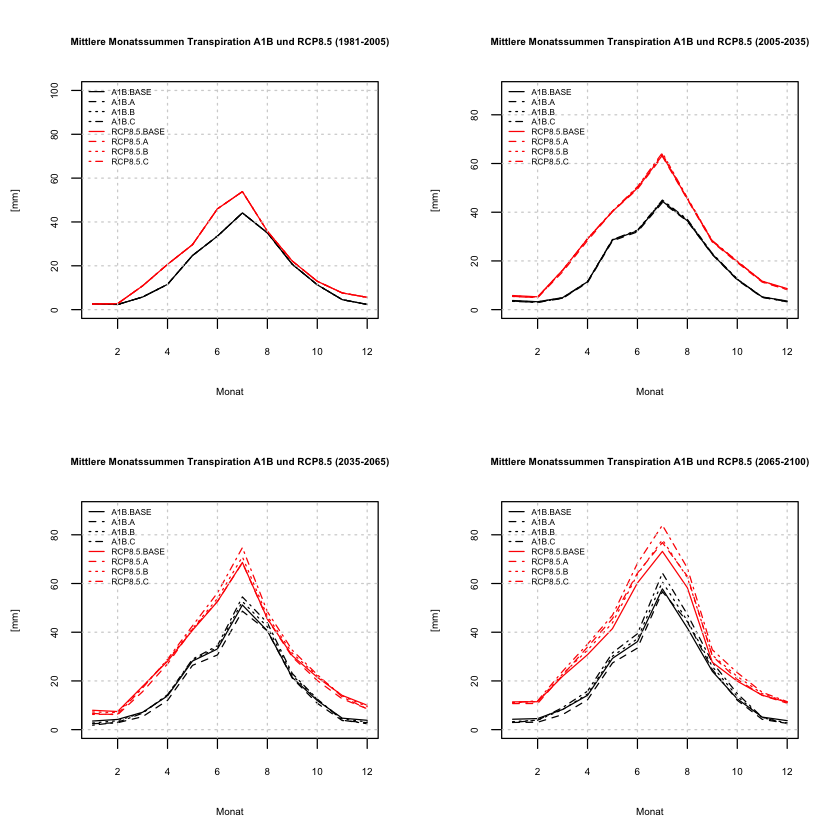

In [100]:
#plotten

par(mfrow=c(2,2))
plot(transpiration_1_list[[4]],type="l",ylim=c(0,100),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(transpiration_1_list[[1]],col="black",lty=2)
lines(transpiration_1_list[[2]],col="black",lty=3)
lines(transpiration_1_list[[3]],col="black",lty=4)
lines(transpiration_1_list[[8]],col="red")
lines(transpiration_1_list[[5]],col="red",lty=2)
lines(transpiration_1_list[[6]],col="red",lty=3)
lines(transpiration_1_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen Transpiration A1B und RCP8.5 (1981-2005)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(transpiration_2_list[[4]],type="l",ylim=c(0,90),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(transpiration_2_list[[1]],col="black",lty=2)
lines(transpiration_2_list[[2]],col="black",lty=3)
lines(transpiration_2_list[[3]],col="black",lty=4)
lines(transpiration_2_list[[8]],col="red")
lines(transpiration_2_list[[5]],col="red",lty=2)
lines(transpiration_2_list[[6]],col="red",lty=3)
lines(transpiration_2_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen Transpiration A1B und RCP8.5 (2005-2035)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(transpiration_3_list[[4]],type="l",ylim=c(0,90),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(transpiration_3_list[[1]],col="black",lty=2)
lines(transpiration_3_list[[2]],col="black",lty=3)
lines(transpiration_3_list[[3]],col="black",lty=4)
lines(transpiration_3_list[[8]],col="red")
lines(transpiration_3_list[[5]],col="red",lty=2)
lines(transpiration_3_list[[6]],col="red",lty=3)
lines(transpiration_3_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen Transpiration A1B und RCP8.5 (2035-2065)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(transpiration_4_list[[4]],type="l",ylim=c(0,90),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(transpiration_4_list[[1]],col="black",lty=2)
lines(transpiration_4_list[[2]],col="black",lty=3)
lines(transpiration_4_list[[3]],col="black",lty=4)
lines(transpiration_4_list[[8]],col="red")
lines(transpiration_4_list[[5]],col="red",lty=2)
lines(transpiration_4_list[[6]],col="red",lty=3)
lines(transpiration_4_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlere Monatssummen Transpiration A1B und RCP8.5 (2065-2100)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

In [101]:
#Tabelle erstellen, 4. Zeitscheibe
transpiration_4_table=cbind.data.frame(transpiration_4_list[[1]][1],transpiration_4_list[[1]][2],transpiration_4_list[[2]][2],transpiration_4_list[[3]][2],transpiration_4_list[[4]][2],
                      transpiration_4_list[[5]][2],transpiration_4_list[[6]][2],transpiration_4_list[[7]][2],transpiration_4_list[[8]][2])
colnames(transpiration_4_table)=c("month",scenario)
transpiration_4_table

#3. Zeitscheibe
transpiration_3_table=cbind.data.frame(transpiration_3_list[[1]][1],transpiration_3_list[[1]][2],transpiration_3_list[[2]][2],transpiration_3_list[[3]][2],transpiration_3_list[[4]][2],
                      transpiration_3_list[[5]][2],transpiration_3_list[[6]][2],transpiration_3_list[[7]][2],transpiration_3_list[[8]][2])
colnames(transpiration_3_table)=c("month",scenario)
#transpiration_3_table

#2. Zeitscheibe
transpiration_2_table=cbind.data.frame(transpiration_2_list[[1]][1],transpiration_2_list[[1]][2],transpiration_2_list[[2]][2],transpiration_2_list[[3]][2],transpiration_2_list[[4]][2],
                      transpiration_2_list[[5]][2],transpiration_2_list[[6]][2],transpiration_2_list[[7]][2],transpiration_2_list[[8]][2])
colnames(transpiration_2_table)=c("month",scenario)
#transpiration_2_table

#1. Zeitscheibe
transpiration_1_table=cbind.data.frame(transpiration_1_list[[1]][1],transpiration_1_list[[1]][2],transpiration_1_list[[2]][2],transpiration_1_list[[3]][2],transpiration_1_list[[4]][2],
                      transpiration_1_list[[5]][2],transpiration_1_list[[6]][2],transpiration_1_list[[7]][2],transpiration_1_list[[8]][2])
colnames(transpiration_1_table)=c("month",scenario)
transpiration_1_table

month,A1B.A,A1B.B,A1B.C,A1B.BASELINE,RCP85.A,RCP85.B,RCP85.C,RCP85.BASELINE
01,2.959800,3.287634,2.933231,4.265818,10.69450,11.05570,11.10954,11.40460
02,3.038432,3.872355,3.868711,4.539715,10.73155,11.54216,11.82520,11.46766
03,6.169711,8.218487,9.054244,8.277771,22.35796,22.80185,23.94420,21.90614
04,12.249827,14.635610,15.798856,14.092426,33.92978,32.63607,35.11902,30.77993
05,27.377101,30.142150,31.555018,29.262936,45.58871,43.87105,46.95190,41.49007
06,33.490186,37.307178,39.358833,36.125121,64.27775,63.76299,68.28563,60.23089
07,56.646726,60.676240,64.314270,57.779909,76.79553,77.97292,83.95166,73.17966
08,44.343648,44.654520,47.306968,41.708525,63.01127,62.43384,66.34555,58.27555
09,24.699261,25.901539,27.602660,23.970732,30.27227,30.59756,32.80562,27.66217
10,12.058666,13.692685,14.806143,12.631941,20.65262,21.82723,23.40299,19.90986


month,A1B.A,A1B.B,A1B.C,A1B.BASELINE,RCP85.A,RCP85.B,RCP85.C,RCP85.BASELINE
01,2.650248,2.650248,2.650249,2.650248,2.567427,2.567429,2.567429,2.567426
02,2.335948,2.335948,2.335948,2.335950,2.747582,2.747582,2.747584,2.747583
03,5.750247,5.750250,5.750239,5.750261,10.832302,10.832302,10.832297,10.832305
04,11.535152,11.535144,11.535154,11.535148,20.658893,20.658880,20.658878,20.658887
05,24.691723,24.691699,24.691735,24.691716,29.641864,29.641853,29.641834,29.641864
06,33.532269,33.532293,33.532263,33.532273,45.986955,45.986928,45.986930,45.986952
07,44.127875,44.127920,44.127898,44.127877,53.844559,53.844438,53.844525,53.844555
08,35.051295,35.051312,35.051248,35.051257,35.772285,35.772318,35.772319,35.772361
09,20.681790,20.681772,20.681778,20.681751,22.144694,22.144718,22.144707,22.144695
10,11.337701,11.337705,11.337703,11.337707,12.944234,12.944230,12.944223,12.944229


In [50]:
#Einlesen von Abfluss
runoff_total=read.table("runoff_total.csv", header=T, dec=".",sep="\t")
summary(runoff_total)

       datetime        A1B.A            A1B.B             A1B.C        
 1981-10-31:   1   Min.   : 10.04   Min.   :  9.472   Min.   :  8.876  
 1981-11-30:   1   1st Qu.: 41.21   1st Qu.: 40.232   1st Qu.: 39.537  
 1981-12-31:   1   Median : 64.37   Median : 62.270   Median : 61.751  
 1982-01-31:   1   Mean   : 77.79   Mean   : 75.653   Mean   : 73.884  
 1982-02-28:   1   3rd Qu.:102.48   3rd Qu.: 99.135   3rd Qu.: 95.303  
 1982-03-31:   1   Max.   :405.59   Max.   :405.591   Max.   :405.594  
 (Other)   :1422                                                       
  A1B.BASELINE       RCP85.A           RCP85.B          RCP85.C       
 Min.   : 10.28   Min.   :  4.057   Min.   :  3.73   Min.   :  3.097  
 1st Qu.: 40.22   1st Qu.: 22.634   1st Qu.: 21.29   1st Qu.: 18.663  
 Median : 63.54   Median : 42.244   Median : 40.61   Median : 39.203  
 Mean   : 77.27   Mean   : 54.614   Mean   : 52.99   Mean   : 51.181  
 3rd Qu.:101.61   3rd Qu.: 72.273   3rd Qu.: 70.53   3rd Qu.: 68.203 

In [51]:
runoff_total$datetime = as.Date(runoff_total$datetime)

In [52]:
#Zeitscheiben definieren für Abfluss

runoff_total$month = format(runoff_total$datetime, "%m") #zuerst eine Monatsspalte hinzufügen

runoff_1 = runoff_total[runoff_total$datetime>="1981-10-31" & runoff_total$datetime<="2005-09-30",]
runoff_1_list=list()
for(i in c(1:8)){
    runoff_1_list[[i]]=aggregate(runoff_1[[i+1]] ~ month, data=runoff_1, FUN= mean)
}
runoff_1_list#erste liste anzeigen lassen

# Zweite Zeitscheibe Abfluss
runoff_2 = runoff_total[runoff_total$datetime>="2005-10-31" & runoff_total$datetime<="2035-09-30",]
runoff_2_list=list()
for(i in c(1:8)){
    runoff_2_list[[i]]=aggregate(runoff_2[[i+1]] ~ month, data=runoff_2, FUN= mean)
}

# Dritte Zeitscheibe Abfluss
runoff_3 = runoff_total[runoff_total$datetime>="2035-10-31" & runoff_total$datetime<="2065-09-30",]
runoff_3_list=list()
for(i in c(1:8)){
    runoff_3_list[[i]]=aggregate(runoff_3[[i+1]] ~ month, data=runoff_3, FUN= mean)
}

# Vierte Zeitscheibe Abfluss
runoff_4 = runoff_total[runoff_total$datetime>="2070-10-31" & runoff_total$datetime<="2100-09-30",]
runoff_4_list=list()
for(i in c(1:8)){
    runoff_4_list[[i]]=aggregate(runoff_4[[i+1]] ~ month, data=runoff_4, FUN= mean)
}

month,runoff_1[[i + 1]]
01,43.31830
02,41.20305
03,68.65645
04,95.93214
05,182.03534
06,128.84334
07,113.93567
08,103.73793
09,85.39732
10,71.41056


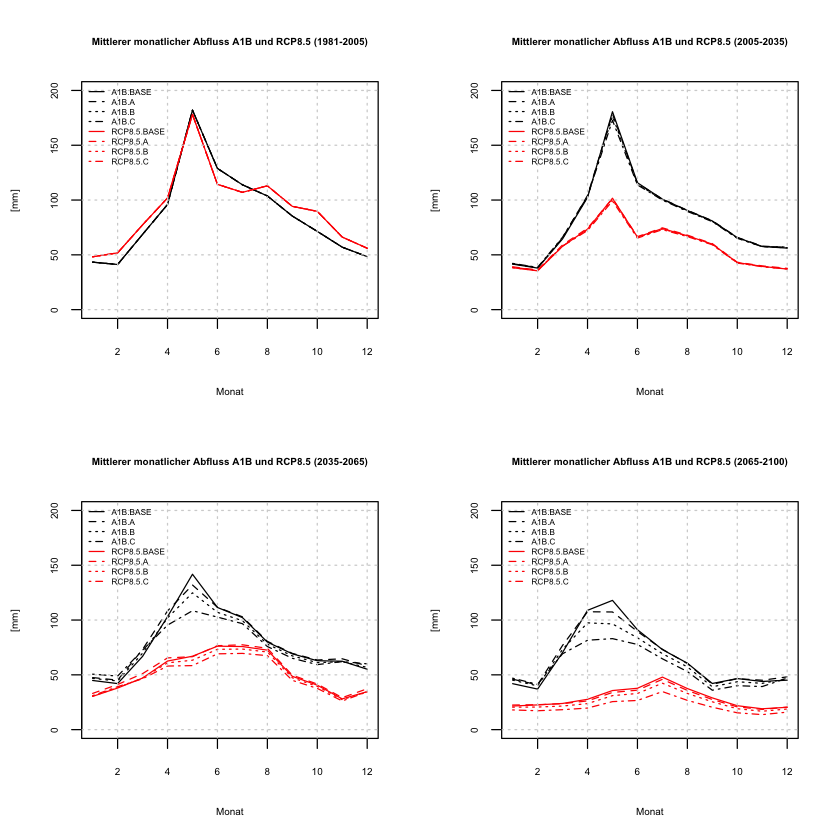

In [55]:
#plotten

par(mfrow=c(2,2))
plot(runoff_1_list[[4]],type="l",ylim=c(0,200),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(runoff_1_list[[1]],col="black",lty=2)
lines(runoff_1_list[[2]],col="black",lty=3)
lines(runoff_1_list[[3]],col="black",lty=4)
lines(runoff_1_list[[8]],col="red")
lines(runoff_1_list[[5]],col="red",lty=2)
lines(runoff_1_list[[6]],col="red",lty=3)
lines(runoff_1_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer monatlicher Abfluss A1B und RCP8.5 (1981-2005)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(runoff_2_list[[4]],type="l",ylim=c(0,200),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(runoff_2_list[[1]],col="black",lty=2)
lines(runoff_2_list[[2]],col="black",lty=3)
lines(runoff_2_list[[3]],col="black",lty=4)
lines(runoff_2_list[[8]],col="red")
lines(runoff_2_list[[5]],col="red",lty=2)
lines(runoff_2_list[[6]],col="red",lty=3)
lines(runoff_2_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer monatlicher Abfluss A1B und RCP8.5 (2005-2035)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(runoff_3_list[[4]],type="l",ylim=c(0,200),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(runoff_3_list[[1]],col="black",lty=2)
lines(runoff_3_list[[2]],col="black",lty=3)
lines(runoff_3_list[[3]],col="black",lty=4)
lines(runoff_3_list[[8]],col="red")
lines(runoff_3_list[[5]],col="red",lty=2)
lines(runoff_3_list[[6]],col="red",lty=3)
lines(runoff_3_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer monatlicher Abfluss A1B und RCP8.5 (2035-2065)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(runoff_4_list[[4]],type="l",ylim=c(0,200),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(runoff_4_list[[1]],col="black",lty=2)
lines(runoff_4_list[[2]],col="black",lty=3)
lines(runoff_4_list[[3]],col="black",lty=4)
lines(runoff_4_list[[8]],col="red")
lines(runoff_4_list[[5]],col="red",lty=2)
lines(runoff_4_list[[6]],col="red",lty=3)
lines(runoff_4_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer monatlicher Abfluss A1B und RCP8.5 (2065-2100)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

In [102]:
#Tabelle erstellen, 4. Zeitscheibe
runoff_4_table=cbind.data.frame(runoff_4_list[[1]][1],runoff_4_list[[1]][2],runoff_4_list[[2]][2],runoff_4_list[[3]][2],runoff_4_list[[4]][2],
                      runoff_4_list[[5]][2],runoff_4_list[[6]][2],runoff_4_list[[7]][2],runoff_4_list[[8]][2])
colnames(runoff_4_table)=c("month",scenario)
runoff_4_table

#3. Zeitscheibe
runoff_3_table=cbind.data.frame(runoff_3_list[[1]][1],runoff_3_list[[1]][2],runoff_3_list[[2]][2],runoff_3_list[[3]][2],runoff_3_list[[4]][2],
                      runoff_3_list[[5]][2],runoff_3_list[[6]][2],runoff_3_list[[7]][2],runoff_3_list[[8]][2])
colnames(runoff_3_table)=c("month",scenario)
#runoff_3_table

#2. Zeitscheibe
runoff_2_table=cbind.data.frame(runoff_2_list[[1]][1],runoff_2_list[[1]][2],runoff_2_list[[2]][2],runoff_2_list[[3]][2],runoff_2_list[[4]][2],
                      runoff_2_list[[5]][2],runoff_2_list[[6]][2],runoff_2_list[[7]][2],runoff_2_list[[8]][2])
colnames(runoff_2_table)=c("month",scenario)
#runoff_2_table

#1. Zeitscheibe
runoff_1_table=cbind.data.frame(runoff_1_list[[1]][1],runoff_1_list[[1]][2],runoff_1_list[[2]][2],runoff_1_list[[3]][2],runoff_1_list[[4]][2],
                      runoff_1_list[[5]][2],runoff_1_list[[6]][2],runoff_1_list[[7]][2],runoff_1_list[[8]][2])
colnames(runoff_1_table)=c("month",scenario)
runoff_1_table

month,A1B.A,A1B.B,A1B.C,A1B.BASELINE,RCP85.A,RCP85.B,RCP85.C,RCP85.BASELINE
01,46.01201,45.14057,46.94025,41.93818,22.45761,20.50159,17.97773,21.53657
02,40.90199,39.92502,41.29817,36.99599,22.75895,20.61362,17.24748,22.57780
03,76.85947,73.25060,69.22864,70.38390,23.69353,21.52302,18.20569,23.88955
04,107.55460,97.41571,81.58127,108.86442,26.22796,23.75418,19.68863,27.69682
05,107.36217,96.46704,83.03869,117.93674,33.93710,31.01903,25.56692,35.66997
06,89.60869,83.80734,77.70940,91.14415,36.01216,33.00303,26.63052,37.75559
07,73.34567,69.34603,64.63198,73.04315,45.90441,42.37023,34.71413,47.93141
08,60.28691,57.25107,52.99719,60.65177,35.80350,33.04941,26.70886,37.49916
09,41.41247,39.11774,35.97085,42.11695,27.49579,25.39233,20.45380,28.96384
10,46.49329,43.69759,40.09229,46.60177,20.77452,19.07203,15.35605,21.84105


month,A1B.A,A1B.B,A1B.C,A1B.BASELINE,RCP85.A,RCP85.B,RCP85.C,RCP85.BASELINE
01,43.31830,43.31848,43.31850,43.31741,48.24997,48.24994,48.25166,48.25034
02,41.20305,41.20333,41.20291,41.20374,51.79171,51.79121,51.79145,51.78998
03,68.65645,68.65635,68.65490,68.65592,77.34913,77.35004,77.34964,77.34908
04,95.93214,95.93165,95.93353,95.93180,101.87992,101.88001,101.87803,101.87931
05,182.03534,182.03578,182.03645,182.03545,178.09887,178.09861,178.09820,178.09934
06,128.84334,128.84405,128.84351,128.84426,114.32757,114.32714,114.32682,114.32817
07,113.93567,113.93408,113.93445,113.93536,107.02523,107.02549,107.02429,107.02550
08,103.73793,103.73713,103.73595,103.73754,112.98075,112.97991,112.98089,112.98085
09,85.39732,85.39772,85.39830,85.39852,94.24264,94.24307,94.24350,94.24337
10,71.41056,71.41031,71.41075,71.41038,89.69221,89.69295,89.69245,89.69332


In [57]:
#Einlesen von interception_evar_total
interception_evar_total=read.table("interception_evar_total.csv", header=T, dec=".",sep="\t")
summary(interception_evar_total)

       datetime        A1B.A              A1B.B              A1B.C      
 1981-10-31:   1   Min.   : 0.00003   Min.   : 0.00002   Min.   : 0.00  
 1981-11-30:   1   1st Qu.: 8.17909   1st Qu.: 8.74263   1st Qu.: 8.89  
 1981-12-31:   1   Median :17.14841   Median :17.80992   Median :18.57  
 1982-01-31:   1   Mean   :22.29926   Mean   :22.41874   Mean   :22.91  
 1982-02-28:   1   3rd Qu.:34.05131   3rd Qu.:33.85789   3rd Qu.:34.53  
 1982-03-31:   1   Max.   :71.82055   Max.   :69.03549   Max.   :71.98  
 (Other)   :1422                                                        
  A1B.BASELINE         RCP85.A          RCP85.B          RCP85.C      
 Min.   : 0.00003   Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 8.27894   1st Qu.: 8.806   1st Qu.: 9.306   1st Qu.: 9.388  
 Median :16.97431   Median :17.013   Median :17.636   Median :18.188  
 Mean   :21.74312   Mean   :21.629   Mean   :21.614   Mean   :21.996  
 3rd Qu.:32.84768   3rd Qu.:32.732   3rd Qu.:32.600   3rd Qu.

In [58]:
interception_evar_total$datetime = as.Date(interception_evar_total$datetime)

In [59]:
#Zeitscheiben definieren für interception_evar_total

interception_evar_total$month = format(interception_evar_total$datetime, "%m") #zuerst eine Monatsspalte hinzufügen

interception_evar_1 = interception_evar_total[interception_evar_total$datetime>="1981-10-31" & interception_evar_total$datetime<="2005-09-30",]
interception_evar_1_list=list()
for(i in c(1:8)){
    interception_evar_1_list[[i]]=aggregate(interception_evar_1[[i+1]] ~ month, data=interception_evar_1, FUN= mean)
}
interception_evar_1_list#erste liste anzeigen lassen

# Zweite Zeitscheibe interception_evar_total
interception_evar_2 = interception_evar_total[interception_evar_total$datetime>="2005-10-31" & interception_evar_total$datetime<="2035-09-30",]
interception_evar_2_list=list()
for(i in c(1:8)){
    interception_evar_2_list[[i]]=aggregate(interception_evar_2[[i+1]] ~ month, data=interception_evar_2, FUN= mean)
}

# Dritte Zeitscheibe interception_evar_total
interception_evar_3 = interception_evar_total[interception_evar_total$datetime>="2035-10-31" & interception_evar_total$datetime<="2065-09-30",]
interception_evar_3_list=list()
for(i in c(1:8)){
    interception_evar_3_list[[i]]=aggregate(interception_evar_3[[i+1]] ~ month, data=interception_evar_3, FUN= mean)
}

# Vierte Zeitscheibe interception_evar_total
interception_evar_4 = interception_evar_total[interception_evar_total$datetime>="2070-10-31" & interception_evar_total$datetime<="2100-09-30",]
interception_evar_4_list=list()
for(i in c(1:8)){
    interception_evar_4_list[[i]]=aggregate(interception_evar_4[[i+1]] ~ month, data=interception_evar_4, FUN= mean)
}

month,interception_evar_1[[i + 1]]
01,5.319505
02,6.010660
03,10.971688
04,17.411583
05,28.663536
06,42.324691
07,43.793544
08,41.492165
09,25.386887
10,15.190137


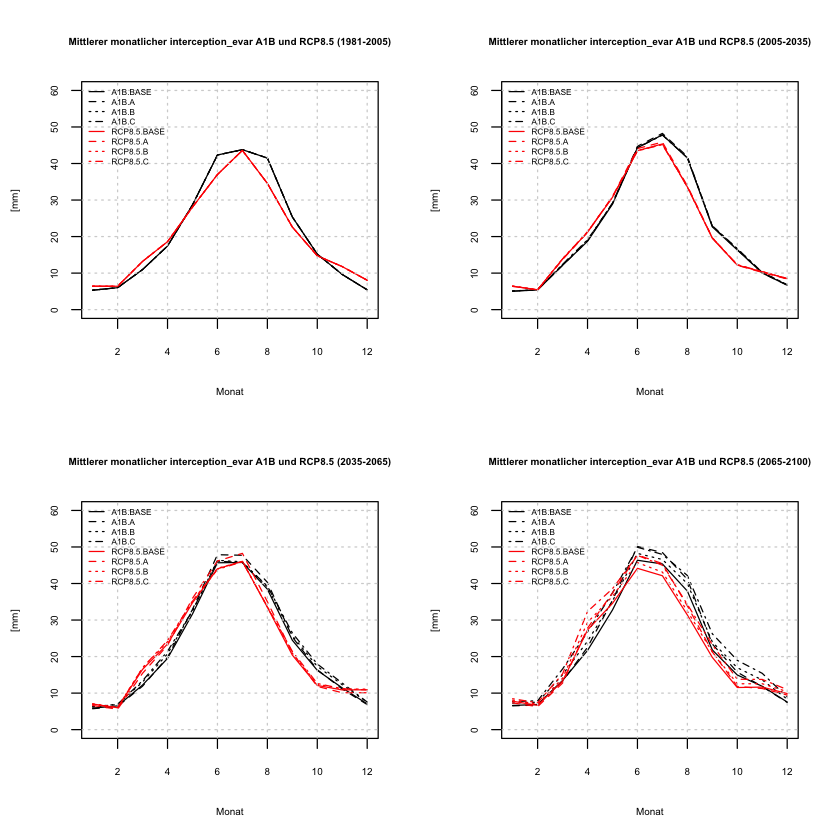

In [61]:
#plotten

par(mfrow=c(2,2))
plot(interception_evar_1_list[[4]],type="l",ylim=c(0,60),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(interception_evar_1_list[[1]],col="black",lty=2)
lines(interception_evar_1_list[[2]],col="black",lty=3)
lines(interception_evar_1_list[[3]],col="black",lty=4)
lines(interception_evar_1_list[[8]],col="red")
lines(interception_evar_1_list[[5]],col="red",lty=2)
lines(interception_evar_1_list[[6]],col="red",lty=3)
lines(interception_evar_1_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer monatlicher interception_evar A1B und RCP8.5 (1981-2005)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(interception_evar_2_list[[4]],type="l",ylim=c(0,60),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(interception_evar_2_list[[1]],col="black",lty=2)
lines(interception_evar_2_list[[2]],col="black",lty=3)
lines(interception_evar_2_list[[3]],col="black",lty=4)
lines(interception_evar_2_list[[8]],col="red")
lines(interception_evar_2_list[[5]],col="red",lty=2)
lines(interception_evar_2_list[[6]],col="red",lty=3)
lines(interception_evar_2_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer monatlicher interception_evar A1B und RCP8.5 (2005-2035)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(interception_evar_3_list[[4]],type="l",ylim=c(0,60),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(interception_evar_3_list[[1]],col="black",lty=2)
lines(interception_evar_3_list[[2]],col="black",lty=3)
lines(interception_evar_3_list[[3]],col="black",lty=4)
lines(interception_evar_3_list[[8]],col="red")
lines(interception_evar_3_list[[5]],col="red",lty=2)
lines(interception_evar_3_list[[6]],col="red",lty=3)
lines(interception_evar_3_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer monatlicher interception_evar A1B und RCP8.5 (2035-2065)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

plot(interception_evar_4_list[[4]],type="l",ylim=c(0,60),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(interception_evar_4_list[[1]],col="black",lty=2)
lines(interception_evar_4_list[[2]],col="black",lty=3)
lines(interception_evar_4_list[[3]],col="black",lty=4)
lines(interception_evar_4_list[[8]],col="red")
lines(interception_evar_4_list[[5]],col="red",lty=2)
lines(interception_evar_4_list[[6]],col="red",lty=3)
lines(interception_evar_4_list[[7]],col="red",lty=4)
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer monatlicher interception_evar A1B und RCP8.5 (2065-2100)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","A1B.A","A1B.B","A1B.C","RCP8.5.BASE","RCP8.5.A","RCP8.5.B","RCP8.5.C"),
       col = c("black","black","black","black","red","red","red","red"),lty=linetype,bty="n",cex=0.5)

In [62]:
#Tabelle erstellen
interception_evar_4_table=cbind.data.frame(interception_evar_4_list[[1]][1],interception_evar_4_list[[1]][2],interception_evar_4_list[[2]][2],interception_evar_4_list[[3]][2],interception_evar_4_list[[4]][2],
                      interception_evar_4_list[[5]][2],interception_evar_4_list[[6]][2],interception_evar_4_list[[7]][2],interception_evar_4_list[[8]][2])
colnames(interception_evar_4_table)=c("month",scenario)
interception_evar_4_table

month,A1B.A,A1B.B,A1B.C,A1B.BASELINE,RCP85.A,RCP85.B,RCP85.C,RCP85.BASELINE
01,6.518599,7.275440,7.703846,6.617486,7.324290,8.073922,8.460522,7.778400
02,6.724227,7.523200,7.890132,6.893860,6.300229,6.985979,7.347575,6.648058
03,13.233703,15.029263,16.607370,13.453640,12.737580,14.086075,15.252566,13.295308
04,22.546625,24.197306,26.743217,21.675783,27.784180,29.369416,32.342940,27.276566
05,35.394904,35.215959,37.423025,32.751701,37.424940,36.468371,38.577516,34.573729
06,50.136817,48.236281,49.922478,46.365976,47.816209,45.723554,47.707398,44.159508
07,48.483159,46.573812,47.963449,45.353123,45.450883,43.120689,45.002102,42.126364
08,41.133988,39.977748,42.194762,37.930574,33.871965,32.426765,34.275101,31.385503
09,23.444222,24.008738,26.241419,21.821534,21.313862,21.275845,23.244855,19.776718
10,15.737985,16.949265,18.972993,14.961007,11.820781,12.554514,13.794844,11.531279


In [63]:
#Einlesen von Niederschlag
precip_total=read.table("precip_total.csv", header=T, dec=".",sep="\t")
summary(precip_total)

       datetime        A1B.A           A1B.B           A1B.C      
 1981-10-31:   1   Min.   :  0.0   Min.   :  0.0   Min.   :  0.0  
 1981-11-30:   1   1st Qu.: 75.3   1st Qu.: 75.3   1st Qu.: 75.3  
 1981-12-31:   1   Median :117.2   Median :117.2   Median :117.2  
 1982-01-31:   1   Mean   :129.9   Mean   :129.9   Mean   :129.9  
 1982-02-28:   1   3rd Qu.:173.6   3rd Qu.:173.6   3rd Qu.:173.6  
 1982-03-31:   1   Max.   :426.4   Max.   :426.4   Max.   :426.4  
 (Other)   :1422                                                  
  A1B.BASELINE      RCP85.A          RCP85.B          RCP85.C      
 Min.   :  0.0   Min.   :  0.00   Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 75.3   1st Qu.: 58.76   1st Qu.: 58.76   1st Qu.: 58.76  
 Median :117.2   Median :109.14   Median :109.14   Median :109.14  
 Mean   :129.9   Mean   :118.97   Mean   :118.97   Mean   :118.97  
 3rd Qu.:173.6   3rd Qu.:170.00   3rd Qu.:170.00   3rd Qu.:170.00  
 Max.   :426.4   Max.   :463.57   Max.   :463.57   Max. 

In [64]:
precip_total$datetime = as.Date(precip_total$datetime)

In [84]:
#Zeitscheiben definieren für Niederschlag

precip_total$month = format(precip_total$datetime, "%m") #zuerst eine Monatsspalte hinzufügen

precip_1 = precip_total[precip_total$datetime>="1981-10-31" & precip_total$datetime<="2005-09-30",]
precip_1_list=list()
for(i in c(1:8)){
    precip_1_list[[i]]=aggregate(precip_1[[i+1]] ~ month, data=precip_1, FUN= mean)
}
precip_1_list#erste liste anzeigen lassen

# Zweite Zeitscheibe Niederschlag
precip_2 = precip_total[precip_total$datetime>="2005-10-31" & precip_total$datetime<="2035-09-30",]
precip_2_list=list()
for(i in c(1:8)){
    precip_2_list[[i]]=aggregate(precip_2[[i+1]] ~ month, data=precip_2, FUN= mean)
}

# Dritte Zeitscheibe Niederschlag
precip_3 = precip_total[precip_total$datetime>="2035-10-31" & precip_total$datetime<="2065-09-30",]
precip_3_list=list()
for(i in c(1:8)){
    precip_3_list[[i]]=aggregate(precip_3[[i+1]] ~ month, data=precip_3, FUN= mean)
}

# Vierte Zeitscheibe Niederschlag
precip_4 = precip_total[precip_total$datetime>="2070-10-31" & precip_total$datetime<="2100-09-30",]
precip_4_list=list()
for(i in c(1:8)){
    precip_4_list[[i]]=aggregate(precip_4[[i+1]] ~ month, data=precip_4, FUN= mean)
}


month,precip_1[[i + 1]]
01,102.55858
02,90.33404
03,108.56462
04,129.25596
05,135.93267
06,197.04825
07,204.49654
08,205.87704
09,136.76788
10,93.76092


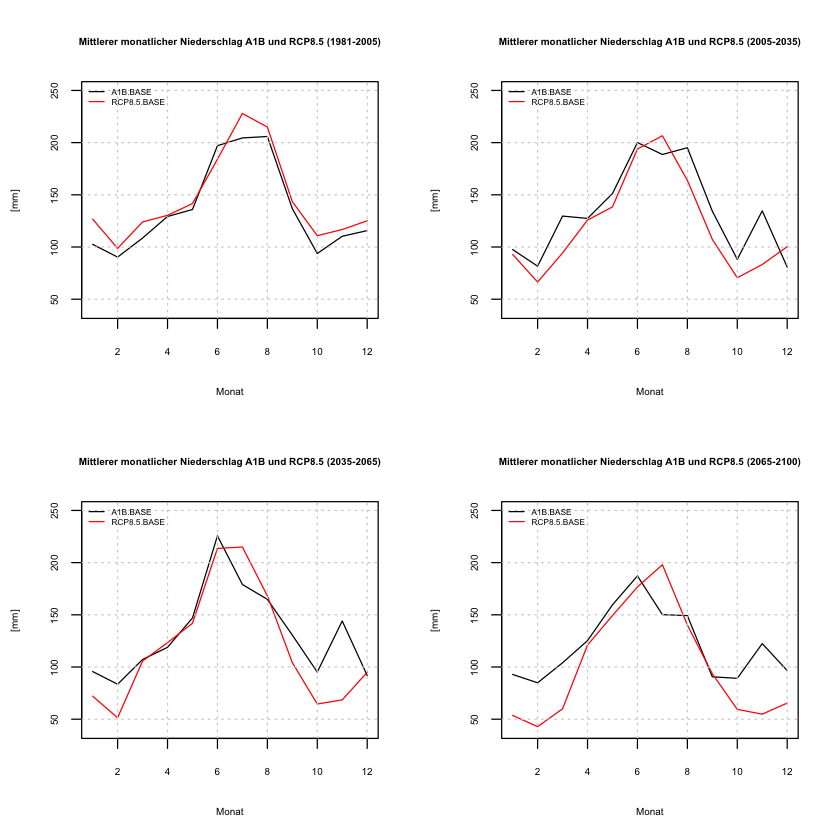

In [74]:
#plotten, nur die Baseline

par(mfrow=c(2,2))
plot(precip_1_list[[4]],type="l",ylim=c(40,250),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(precip_1_list[[8]],col="red")
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer monatlicher Niederschlag A1B und RCP8.5 (1981-2005)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","RCP8.5.BASE"),
       col = c("black","red"),lty=1,1,bty="n",cex=0.5)

plot(precip_2_list[[4]],type="l",ylim=c(40,250),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(precip_2_list[[8]],col="red")
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer monatlicher Niederschlag A1B und RCP8.5 (2005-2035)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","RCP8.5.BASE"),
       col = c("black","red"),lty=1,1,bty="n",cex=0.5)

plot(precip_3_list[[4]],type="l",ylim=c(40,250),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(precip_3_list[[8]],col="red")
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer monatlicher Niederschlag A1B und RCP8.5 (2035-2065)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","RCP8.5.BASE"),
       col = c("black","red"),lty=1,1,bty="n",cex=0.5)

plot(precip_4_list[[4]],type="l",ylim=c(40,250),ylab="[mm]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(precip_4_list[[8]],col="red")
grid(NULL, NULL, lwd = 1)
title(main="Mittlerer monatlicher Niederschlag A1B und RCP8.5 (2065-2100)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","RCP8.5.BASE"),
       col = c("black","red"),lty=1,1,bty="n",cex=0.5)


In [81]:
#Tabelle erstellen, 4. Zeitscheibe
precip_4_table=cbind.data.frame(precip_4_list[[1]][1],precip_4_list[[4]][2],
                      precip_4_list[[8]][2])
colnames(precip_4_table)=c("month","A1B.BASELINE","RCP85.BASELINE")
#precip_4_table

#3. Zeitscheibe
precip_3_table=cbind.data.frame(precip_3_list[[1]][1],precip_3_list[[4]][2],
                      precip_3_list[[8]][2])
colnames(precip_3_table)=c("month","A1B.BASELINE","RCP85.BASELINE")
#precip_3_table

#2.Zeitscheibe
precip_2_table=cbind.data.frame(precip_2_list[[1]][1],precip_2_list[[4]][2],
                      precip_2_list[[8]][2])
colnames(precip_2_table)=c("month","A1B.BASELINE","RCP85.BASELINE")
#precip_2_table

#1.Zeitscheibe
precip_1_table=cbind.data.frame(precip_1_list[[1]][1],precip_1_list[[4]][2],
                      precip_1_list[[8]][2])
colnames(precip_1_table)=c("month","A1B.BASELINE","RCP85.BASELINE")
precip_1_table

month,A1B.BASELINE,RCP85.BASELINE
01,102.55858,126.73296
02,90.33404,98.69688
03,108.56462,124.01000
04,129.25596,130.34417
05,135.93267,141.60842
06,197.04825,184.10788
07,204.49654,227.93708
08,205.87704,214.95083
09,136.76788,143.47338
10,93.76092,110.84137


In [82]:
#Einlesen von Temperatur
temp_total=read.table("temp_total.csv", header=T, dec=".",sep="\t")
summary(temp_total)

       datetime        A1B.A             A1B.B             A1B.C        
 1981-10-31:   1   Min.   :-6.8390   Min.   :-6.8390   Min.   :-6.8390  
 1981-11-30:   1   1st Qu.: 0.3874   1st Qu.: 0.3874   1st Qu.: 0.3874  
 1981-12-31:   1   Median : 6.7856   Median : 6.7856   Median : 6.7856  
 1982-01-31:   1   Mean   : 6.6698   Mean   : 6.6698   Mean   : 6.6698  
 1982-02-28:   1   3rd Qu.:12.3394   3rd Qu.:12.3394   3rd Qu.:12.3394  
 1982-03-31:   1   Max.   :23.7414   Max.   :23.7414   Max.   :23.7414  
 (Other)   :1422                                                        
  A1B.BASELINE        RCP85.A          RCP85.B          RCP85.C      
 Min.   :-6.8390   Min.   :-9.639   Min.   :-9.639   Min.   :-9.639  
 1st Qu.: 0.3874   1st Qu.: 3.536   1st Qu.: 3.536   1st Qu.: 3.536  
 Median : 6.7856   Median :10.091   Median :10.091   Median :10.091  
 Mean   : 6.6698   Mean   : 9.837   Mean   : 9.837   Mean   : 9.837  
 3rd Qu.:12.3394   3rd Qu.:16.009   3rd Qu.:16.009   3rd Qu.:16.00

In [83]:
temp_total$datetime = as.Date(temp_total$datetime)

In [85]:
#Zeitscheiben definieren für Temperatur

temp_total$month = format(temp_total$datetime, "%m") #zuerst eine Monatsspalte hinzufügen

temp_1 = temp_total[temp_total$datetime>="1981-10-31" & temp_total$datetime<="2005-09-30",]
temp_1_list=list()
for(i in c(1:8)){
    temp_1_list[[i]]=aggregate(temp_1[[i+1]] ~ month, data=temp_1, FUN= mean)
}
temp_1_list#erste liste anzeigen lassen

# Zweite Zeitscheibe Niederschlag
temp_2 = temp_total[temp_total$datetime>="2005-10-31" & temp_total$datetime<="2035-09-30",]
temp_2_list=list()
for(i in c(1:8)){
    temp_2_list[[i]]=aggregate(temp_2[[i+1]] ~ month, data=temp_2, FUN= mean)
}

# Dritte Zeitscheibe Niederschlag
temp_3 = temp_total[temp_total$datetime>="2035-10-31" & temp_total$datetime<="2065-09-30",]
temp_3_list=list()
for(i in c(1:8)){
    temp_3_list[[i]]=aggregate(temp_3[[i+1]] ~ month, data=temp_3, FUN= mean)
}

# Vierte Zeitscheibe Niederschlag
temp_4 = temp_total[temp_total$datetime>="2070-10-31" & temp_total$datetime<="2100-09-30",]
temp_4_list=list()
for(i in c(1:8)){
    temp_4_list[[i]]=aggregate(temp_4[[i+1]] ~ month, data=temp_4, FUN= mean)
}


month,temp_1[[i + 1]]
01,-2.3703096
02,-2.1975576
03,0.6591457
04,3.6671785
05,8.6951866
06,11.0065326
07,14.0511135
08,13.5277445
09,10.4598085
10,6.4358510


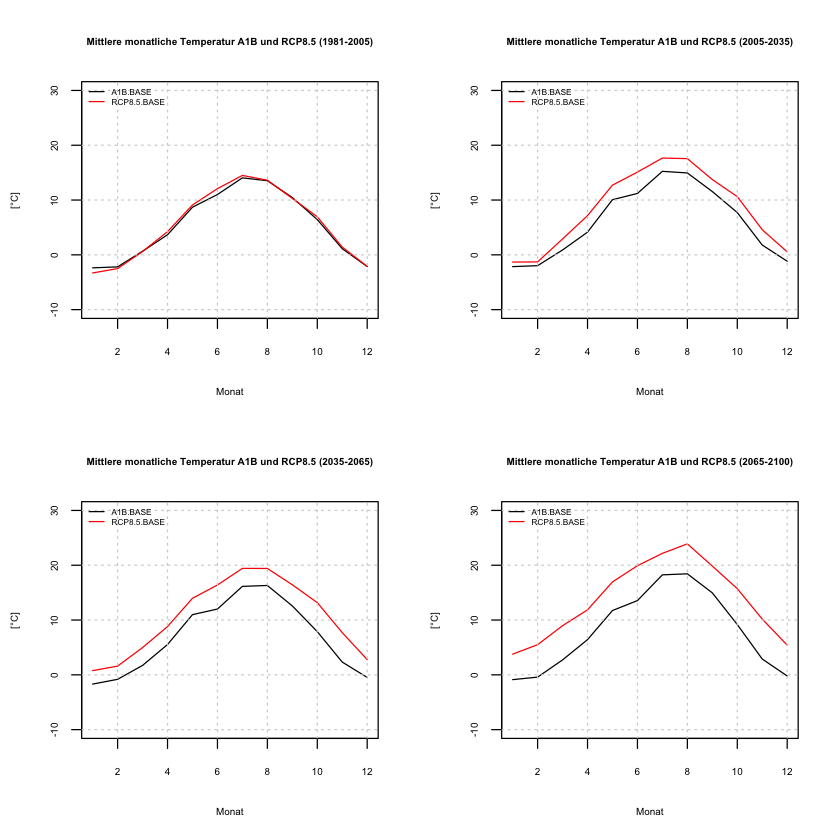

In [90]:
#plotten, nur die Baseline

par(mfrow=c(2,2))
plot(temp_1_list[[4]],type="l",ylim=c(-10,30),ylab="[°C]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(temp_1_list[[8]],col="red")
grid(NULL, NULL, lwd = 1)
title(main="Mittlere monatliche Temperatur A1B und RCP8.5 (1981-2005)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","RCP8.5.BASE"),
       col = c("black","red"),lty=1,1,bty="n",cex=0.5)

plot(temp_2_list[[4]],type="l",ylim=c(-10,30),ylab="[°C]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(temp_2_list[[8]],col="red")
grid(NULL, NULL, lwd = 1)
title(main="Mittlere monatliche Temperatur A1B und RCP8.5 (2005-2035)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","RCP8.5.BASE"),
       col = c("black","red"),lty=1,1,bty="n",cex=0.5)

plot(temp_3_list[[4]],type="l",ylim=c(-10,30),ylab="[°C]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(temp_3_list[[8]],col="red")
grid(NULL, NULL, lwd = 1)
title(main="Mittlere monatliche Temperatur A1B und RCP8.5 (2035-2065)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","RCP8.5.BASE"),
       col = c("black","red"),lty=1,1,bty="n",cex=0.5)

plot(temp_4_list[[4]],type="l",ylim=c(-10,30),ylab="[°C]",xlab="Monat",cex.lab=0.6,cex.axis=0.6)
lines(temp_4_list[[8]],col="red")
grid(NULL, NULL, lwd = 1)
title(main="Mittlere monatliche Temperatur A1B und RCP8.5 (2065-2100)",cex.main=0.6)
legend("topleft",legend=c("A1B.BASE","RCP8.5.BASE"),
       col = c("black","red"),lty=1,1,bty="n",cex=0.5)


In [91]:
#Tabelle erstellen, 4. Zeitscheibe
temp_4_table=cbind.data.frame(temp_4_list[[1]][1],temp_4_list[[4]][2],
                      temp_4_list[[8]][2])
colnames(temp_4_table)=c("month","A1B.BASELINE","RCP85.BASELINE")
#temp_4_table

#3. Zeitscheibe
temp_3_table=cbind.data.frame(temp_3_list[[1]][1],temp_3_list[[4]][2],
                      temp_3_list[[8]][2])
colnames(temp_3_table)=c("month","A1B.BASELINE","RCP85.BASELINE")
#temp_3_table

#2.Zeitscheibe
temp_2_table=cbind.data.frame(temp_2_list[[1]][1],temp_2_list[[4]][2],
                      temp_2_list[[8]][2])
colnames(temp_2_table)=c("month","A1B.BASELINE","RCP85.BASELINE")
#temp_2_table

#1.Zeitscheibe
temp_1_table=cbind.data.frame(temp_1_list[[1]][1],temp_1_list[[4]][2],
                      temp_1_list[[8]][2])
colnames(temp_1_table)=c("month","A1B.BASELINE","RCP85.BASELINE")
temp_1_table

month,A1B.BASELINE,RCP85.BASELINE
01,-2.3703096,-3.3074353
02,-2.1975576,-2.5061441
03,0.6591457,0.6085901
04,3.6671785,4.2368082
05,8.6951866,9.0982732
06,11.0065326,12.0796321
07,14.0511135,14.4921509
08,13.5277445,13.6203171
09,10.4598085,10.3005022
10,6.4358510,6.9372874
